### Logistic regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Load data
user_data = pd.read_csv('/Users/anand/Downloads/user_data.csv')
print(user_data.shape)
print(user_data.head())
# Gives the summary of the data including the mean, median, min, max, standard deviation, etc.
user_data.describe()

(400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


To predict whether a user will purchase the product or not , one need to find out the relationships b/w age and estimated salary. User ID and Gender are not important factors here.

In [27]:
# drop the user_id column
target = user_data['Purchased']
real_user_data = user_data.drop('User ID', axis=1).drop('Gender', axis=1).drop('Purchased', axis=1)
# another way to break the data
x = user_data.iloc[:, [2, 3]].values
y = user_data.iloc[:, 4].values
#real_user_data = real_user_data.drop('Purchased', axis=1)
print(real_user_data.head())
print(real_user_data.shape)
print(target.head())
print(target.shape)

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
(400, 2)
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64
(400,)


In [28]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# transform the data to zero mean and unit variance to normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# calculate the accuracy of the classification
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Lets find out the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#[[65  3]
# [ 8 24]]
# This is the confusion matrix. It says that 65+24 = 89 are correct predictions and 8+3 = 11 are incorrect predictions

0.89
[[65  3]
 [ 8 24]]


### Another example

In [29]:
from scipy import stats
import seaborn as sns; sns.set_theme()

In [31]:
# Load the face fetch_lfw_people dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


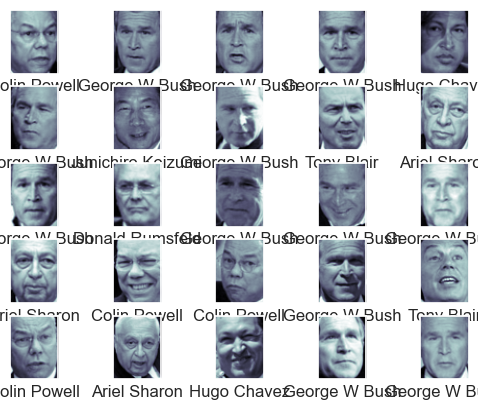

In [32]:
# Let's plot few of them
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

0.8427299703264095
[[ 11   0   2   1   1   0   0   0]
 [  1  59   2   4   0   0   0   2]
 [  1   2  23   4   0   0   0   1]
 [  0   7   1 111   4   1   1   1]
 [  0   0   0   2  17   0   1   3]
 [  1   1   0   1   2  13   0   2]
 [  0   0   0   0   0   0  12   0]
 [  1   0   1   2   0   0   0  38]]
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.86      0.87      0.86        68
  Donald Rumsfeld       0.79      0.74      0.77        31
    George W Bush       0.89      0.88      0.88       126
Gerhard Schroeder       0.71      0.74      0.72        23
      Hugo Chavez       0.93      0.65      0.76        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.81      0.90      0.85        42

         accuracy                           0.84       337
        macro avg       0.82      0.81      0.81       337
     weighted avg       0.84      0.84      0.84 

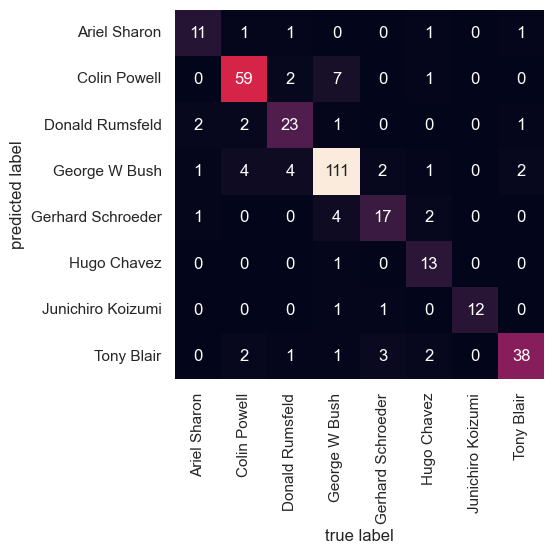

In [38]:
# Now let's do the logistic regression on this data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)
logistic = LogisticRegression(max_iter=10000)
logistic.fit(Xtrain, ytrain)
ypred = logistic.predict(Xtest)

# calculate the accuracy of the classification
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print(accuracy)

# Let's plot the confusion matrix
from sklearn.metrics import confusion_matrix
mat  = confusion_matrix(ytest, ypred)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, target_names=faces.target_names))